In [3]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import pandas as pd

from IPython.display import Image
plt.rcParams["font.size"] = 18 #matplotlib.
%matplotlib inline

In [31]:
#make sure all 3 are in the same units.
position = np.array([4,6,8,10,19,21,23])* 25.4/1000    #[17,2450,2120]
wx = np.array([2050,2180,2220,2350,2800,2830,2980])*1e-6/2
wy = np.array([1740,1820,1920,2030,2500,2550,2700])*1e-6/2

lam = 1064e-9 #light wavelength

Horizontal    Vertical
Beam waist radius[um]    346.100518  326.240787
Waist position [m]        -0.889339   -0.670114
Rayleigh range [inches]   13.924481   12.372317

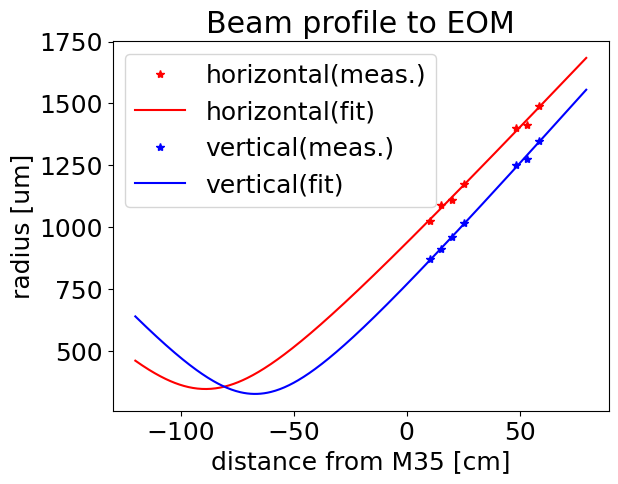

In [33]:
def gaussian_beam(z,w0,z0):
    M=1
    zr = np.pi*w0**2/lam
    w = w0*np.sqrt(1+M**4*((z-z0)/zr)**2)
    return w

init_w0 = 400e-6 #initial guess
wx_popt,_ = curve_fit(gaussian_beam, position, wx,
                             p0=[init_w0, 0.])
wy_popt,_ = curve_fit(gaussian_beam, position, wy,
                             p0=[init_w0, 0.])

zr_x = np.pi*wx_popt[0]**2/lam
zr_y = np.pi*wy_popt[0]**2/lam

pp = np.arange(-1.2,.8,0.005) #x axis on plot below

fig = plt.figure()
plt.plot(position*100,wx*1e6,'*',label='horizontal(meas.)',c='red')
plt.plot(pp*100,gaussian_beam(pp,*wx_popt)*1e6,label='horizontal(fit)',c='red')
plt.plot(position*100,wy*1e6,'*',label='vertical(meas.)',c='blue')
plt.plot(pp*100,gaussian_beam(pp,*wy_popt)*1e6,label='vertical(fit)',c='blue')
plt.legend()
plt.xlabel('distance from M35 [cm]')
plt.ylabel('radius [um]')
plt.title('Beam profile to EOM')
#plt.savefig('./PMC.png')

display(pd.DataFrame([[wx_popt[0]*1e6,wy_popt[0]*1e6],[wx_popt[1],wy_popt[1]],[zr_x/0.0254,zr_y/0.0254]],
                    index = ['Beam waist radius[um]','Waist position [m]','Rayleigh range [inches]'],
                    columns = ['Horizontal', 'Vertical']))